## **Fine-tuning VGG16 Example from Chollet's Book (Pytorch Version)**
- Convolutional neural networks have been applied widely in text, image and audio tasks - although recently replaced by transformers.  
    [Reference: Wikipedia](https://en.wikipedia.org/wiki/Convolutional_neural_network)

- I tried to replicate the code in the book [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff) but using the Pytorch library instead of Keras which is used in the book.

- I found it difficult to work with Keras which is using Tensorflow as backend (Google dropped support for tf on Windows - which means you can't use the GPU for training - *we all know how slow training neural networks with the CPU can be!* )

- Keras can be better than Pytorch sometimes - its just that I could not set up Keras to use Pytorch as backend! (*Using WSL in Vscode works with TF but reading files from the local drives is quite troublesome too!*)

In [1]:
# import os and shutil to move files into folders
import os, shutil

In [2]:
# set the directories
original_dataset_dir = r"D:\ml_examples\dogs_vs_cats"
train_dir = r"D:\ml_examples\dogs_vs_cats\train"
validation_dir = r"D:\ml_examples\dogs_vs_cats\validation"
test_dir = r"D:\ml_examples\dogs_vs_cats\test"

# create working directories
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

# uncomment to create directories
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(train_dir, fname)
#     dst = os.path.join(train_cats_dir, fname)
#     shutil.copyfile(src, dst)

# fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(train_dir, fname)
#     dst = os.path.join(validation_cats_dir, fname)
#     shutil.copyfile(src, dst)

# fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(train_dir, fname)
#     dst = os.path.join(test_cats_dir, fname)
#     shutil.copyfile(src, dst)
 

# fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(train_dir, fname)
#     dst = os.path.join(train_dogs_dir, fname)
#     shutil.copyfile(src, dst)

# fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(train_dir, fname)
#     dst = os.path.join(validation_dogs_dir, fname)
#     shutil.copyfile(src, dst)

# fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(train_dir, fname)
#     dst = os.path.join(test_dogs_dir, fname)
#     shutil.copyfile(src, dst)

In [3]:
import torch
# set seed in torch
torch.manual_seed(235)

# If using CUDA, set seed to CUDA
if torch.cuda.is_available():
    torch.cuda.manual_seed(235)
    torch.cuda.manual_seed_all(235)  # for multi-GPU
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

In [4]:
from torchvision import datasets, transforms 
from torch.utils.data import DataLoader

# specify the transformation for the images - resize to 150x150 and convert to tensor (values between 0 and 1)
transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
])

# load the images with a dataloader - avoid loading all images into memory
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
validation_dataset = datasets.ImageFolder(validation_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)


train_dataloader = DataLoader(train_dataset, batch_size=20, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=20, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=20, shuffle=True)

c:\Users\User\anaconda3\envs\ml_win_old\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Preparing Images for CNN Training 
- In Chollet's book, he resizes all images to size 150 $\times$ 150

- ToTensor in Pytorch converts PIL Image in range [0,255] to [0,1]  
    [ToTensor documentation ](https://pytorch.org/vision/master/generated/torchvision.transforms.ToTensor.html)

- ImageFolder 
    - [ImageFolder documentation -> click on source and look at attributes](https://pytorch.org/vision/master/generated/torchvision.datasets.ImageFolder.html?highlight=image+folder)
    - returns tuple with (picture path, class)  

- Then, we use a DataLoader to load images by batch into our neural network for training - helps to manage memory efficiently and prevents memory overflow

- While training, remember to move the model + data to GPU! *(I did not realise that I used CPU for all computations during my FYP - such a stupid mistake..........)*


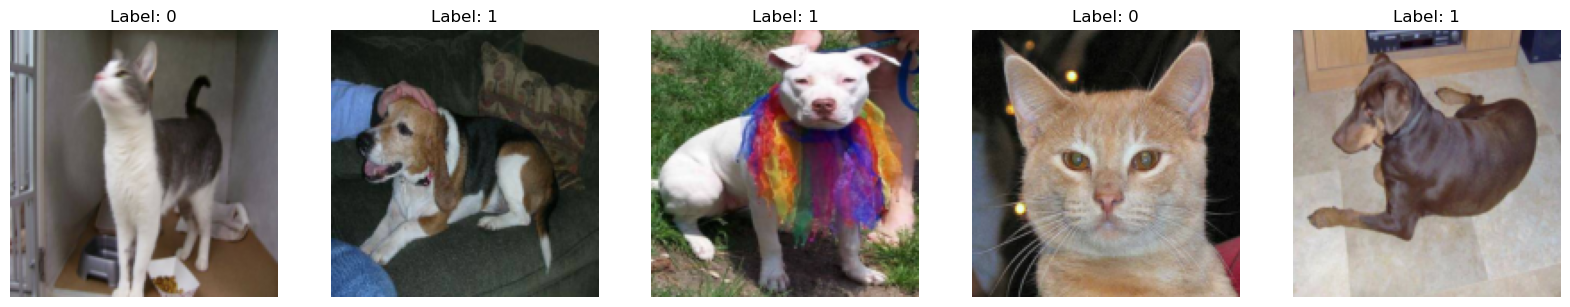

In [5]:
import matplotlib.pyplot as plt

# Display the first 5 images from the training set
plt.figure(figsize=(20, 4)) #set the figure size
for count, (images, labels) in enumerate(train_dataloader):  # Assuming train_loader is already defined
    if count<5:
        # Get the first image and label
        image = images[0].permute(1, 2, 0)  # Rearrange dimensions to (H, W, C) -> originally (channel, height, width)
        label = labels[0]
        # Display image
        plt.subplot(1, 5, count+1)
        plt.imshow(image)
        plt.title(f"Label: {label}")
        plt.axis("off")
    else:
        break
plt.show()

In [6]:
# instantiate the pretrained model from pytorch
from torchvision.models import vgg16
pretrained_model = vgg16(pretrained=True)

c:\Users\User\anaconda3\envs\ml_win_old\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\User\anaconda3\envs\ml_win_old\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [7]:
from torchinfo import summary
summary(pretrained_model, (20,3,150,150), col_names=("input_size", "output_size", "num_params"))

c:\Users\User\anaconda3\envs\ml_win_old\lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
VGG                                      [20, 3, 150, 150]         [20, 1000]                --
├─Sequential: 1-1                        [20, 3, 150, 150]         [20, 512, 4, 4]           --
│    └─Conv2d: 2-1                       [20, 3, 150, 150]         [20, 64, 150, 150]        1,792
│    └─ReLU: 2-2                         [20, 64, 150, 150]        [20, 64, 150, 150]        --
│    └─Conv2d: 2-3                       [20, 64, 150, 150]        [20, 64, 150, 150]        36,928
│    └─ReLU: 2-4                         [20, 64, 150, 150]        [20, 64, 150, 150]        --
│    └─MaxPool2d: 2-5                    [20, 64, 150, 150]        [20, 64, 75, 75]          --
│    └─Conv2d: 2-6                       [20, 64, 75, 75]          [20, 128, 75, 75]         73,856
│    └─ReLU: 2-7                         [20, 128, 75, 75]         [20, 128, 75, 75]         --
│    └─Conv2d: 2-8      

In [8]:
# import torch and related libraries for machine learning
from mimetypes import init
from torch import nn # base class for all neural network modules
from tqdm import tqdm # for iteration (for progress bar)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # to load inputs and targets to GPU (if available)

class CNN_pretrained(nn.Module):
    def __init__(self, pretrained_model, loss_fn=nn.BCELoss()): 
        super().__init__() # inherit from nn.Module (base class for all Modules)

        self.loss_fn = loss_fn # loss function
        self.loss_list = list() # store loss values
        self.acc_list = list() # store training set accuracy values
        self.val_acc_list = list() # store validation set accuracy values

        self.pretrained_layers = pretrained_model.features # load pretrained model

        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512*4*4,256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256,1),
            nn.Sigmoid()
        ) # instantiate layers for classifier 

    # freeze convolutional layers (feature layers in pretrained model)
    def freeze_conv(self,initialize_dense=True):
        if initialize_dense==True:
            for param in self.pretrained_layers.parameters():
                param.requires_grad = False
        elif not initialize_dense:
            for count, param in enumerate(self.pretrained_layers.parameters()):
                if count < 24:
                    param.requires_grad = False
                else:
                    param.requires_grad = True
        print(f"Number of trainable parameters: {sum(p.numel() for p in self.parameters() if p.requires_grad)}")

    # perform forward pass
    def forward(self, x):
        x = self.pretrained_layers(x) # pass through pretrained model to extract features
        x = self.layers(x) # pass through classifier
        return x
    
    # loop to fit model
    def fit(self, train_data, valid_data, epochs=10, opt=torch.optim.RMSprop, lr=0.0001):
        self.lr = lr
        self.opt = opt(self.parameters(), lr=self.lr)

        for i in range(epochs):
            for j, data in enumerate(tqdm(train_data)):
                inputs, targets = data # get inputs
                inputs, targets = inputs.to(device), targets.to(device) # move to device
                self.opt.zero_grad() # zero the gradients before backward pass so that we do accumulate gradients from last epoch
                y_pred = self.forward(inputs)
                loss = self.loss_fn(y_pred,targets.reshape(-1,1).float()) # calculate loss
                loss.backward() # perform backward pass
                self.opt.step()  # update weights
                self.loss_list.append(loss.item()) # update current loss
            print(f"Epoch {i+1}: loss = {loss.item()}")
            print(f"Number of trainable parameters: {sum(p.numel() for p in self.parameters() if p.requires_grad)}")
            
            self.acc_list.append(self.evaluate(train_data)) # evaluate model on training data
            self.val_acc_list.append(self.evaluate(valid_data)) # evaluate model on validation data
        print("Training Complete")
    
    # switch off gradient calculation for prediction
    def predict(self, x):
        self.eval()
        with torch.no_grad():
            return self.forward(x)

    def evaluate(self, valid_data):
        # set model to eval mode
        self.eval()
        count= 0
        running_corrects = 0
        # loop over data and calculate accuracy (note that we use cross entropy loss to train classifier - 
        # match distribution of class labels with true value) 
        with torch.no_grad():
            for i, data in enumerate(tqdm(valid_data)):
                inputs, y_true = data
                inputs, y_true = inputs.to(device), y_true.to(device)
                y_pred = (self.predict(inputs) >= 0.5).long()
                running_corrects += torch.sum(y_pred == y_true.view_as(y_pred))
                count += y_true.shape[0]
        
        accuracy = running_corrects.float() / count
        print(f"Accuracy: {accuracy:.4f}")
        return accuracy

### **Training Procedure!!!!**
- Note that we freeze the features first, then intialize the dense classifier layers by training on data

- Then, after the dense layers have been trained - we unfreeze the last conv layers for training with the dense classifier

In [9]:
# instantiate the model
model = CNN_pretrained(pretrained_model=pretrained_model)
model.to(device) #move model to GPU if available
summary(model, (20,3,150,150), col_names=("input_size", "output_size", "num_params"))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
CNN_pretrained                           [20, 3, 150, 150]         [20, 1]                   --
├─Sequential: 1-1                        [20, 3, 150, 150]         [20, 512, 4, 4]           --
│    └─Conv2d: 2-1                       [20, 3, 150, 150]         [20, 64, 150, 150]        1,792
│    └─ReLU: 2-2                         [20, 64, 150, 150]        [20, 64, 150, 150]        --
│    └─Conv2d: 2-3                       [20, 64, 150, 150]        [20, 64, 150, 150]        36,928
│    └─ReLU: 2-4                         [20, 64, 150, 150]        [20, 64, 150, 150]        --
│    └─MaxPool2d: 2-5                    [20, 64, 150, 150]        [20, 64, 75, 75]          --
│    └─Conv2d: 2-6                       [20, 64, 75, 75]          [20, 128, 75, 75]         73,856
│    └─ReLU: 2-7                         [20, 128, 75, 75]         [20, 128, 75, 75]         --
│    └─Conv2d: 2-8      

### **Final CNN Structure**
1. feature
- Convolutional and maxpool layers 
- used to extract features

2. classifier
- 2 dense layers with ReLU activation

In [10]:
model.freeze_conv(initialize_dense=True) # freeze convolutional layers
model.fit(train_data=train_dataloader,valid_data=validation_dataloader, epochs=3, lr=0.0001) # initialize the dense layers

Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:14<00:00,  6.80it/s]


Epoch 1: loss = 0.09004160016775131
Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:10<00:00,  9.76it/s]


Accuracy: 0.9795


100%|██████████| 50/50 [00:05<00:00,  8.49it/s]


Accuracy: 0.9340


100%|██████████| 100/100 [00:14<00:00,  6.95it/s]


Epoch 2: loss = 0.025023937225341797
Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:11<00:00,  8.90it/s]


Accuracy: 0.9955


100%|██████████| 50/50 [00:05<00:00,  8.58it/s]


Accuracy: 0.9300


100%|██████████| 100/100 [00:14<00:00,  6.98it/s]


Epoch 3: loss = 0.01017154660075903
Number of trainable parameters: 2097665


100%|██████████| 100/100 [00:11<00:00,  8.62it/s]


Accuracy: 0.9995


100%|██████████| 50/50 [00:06<00:00,  8.05it/s]

Accuracy: 0.9370
Training Complete


In [11]:
model.freeze_conv(initialize_dense=False) # freeze early convolutional layers (leave last conv unfreezed)
model.fit(train_data=train_dataloader,valid_data=validation_dataloader, epochs=30, lr=0.00001) # train classifier layers and last conv layers together

Number of trainable parameters: 4457473


100%|██████████| 100/100 [00:16<00:00,  6.16it/s]


Epoch 1: loss = 0.0026816697791218758
Number of trainable parameters: 4457473


100%|██████████| 100/100 [00:12<00:00,  8.03it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:05<00:00,  8.51it/s]


Accuracy: 0.9360


100%|██████████| 100/100 [00:15<00:00,  6.34it/s]


Epoch 2: loss = 0.002318563638255
Number of trainable parameters: 4457473


100%|██████████| 100/100 [00:11<00:00,  8.49it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:05<00:00,  8.54it/s]


Accuracy: 0.9380


100%|██████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 3: loss = 0.002493123058229685
Number of trainable parameters: 4457473


100%|██████████| 100/100 [00:12<00:00,  8.29it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:06<00:00,  8.22it/s]


Accuracy: 0.9380


100%|██████████| 100/100 [00:15<00:00,  6.25it/s]


Epoch 4: loss = 0.002046220237389207
Number of trainable parameters: 4457473


100%|██████████| 100/100 [00:11<00:00,  8.43it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:06<00:00,  7.92it/s]


Accuracy: 0.9380


100%|██████████| 100/100 [00:16<00:00,  6.23it/s]


Epoch 5: loss = 0.00047082258970476687
Number of trainable parameters: 4457473


100%|██████████| 100/100 [00:12<00:00,  8.22it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:06<00:00,  8.20it/s]


Accuracy: 0.9370


100%|██████████| 100/100 [00:16<00:00,  6.08it/s]


Epoch 6: loss = 0.0015472943196073174
Number of trainable parameters: 4457473


100%|██████████| 100/100 [00:12<00:00,  8.25it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:06<00:00,  7.93it/s]


Accuracy: 0.9380


100%|██████████| 100/100 [00:16<00:00,  6.03it/s]


Epoch 7: loss = 0.0010483016958460212
Number of trainable parameters: 4457473


100%|██████████| 100/100 [00:12<00:00,  8.12it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:06<00:00,  7.54it/s]


Accuracy: 0.9370


100%|██████████| 100/100 [00:16<00:00,  6.19it/s]


Epoch 8: loss = 0.00041302540921606123
Number of trainable parameters: 4457473


100%|██████████| 100/100 [00:11<00:00,  8.35it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:06<00:00,  7.93it/s]


Accuracy: 0.9370


100%|██████████| 100/100 [00:16<00:00,  6.14it/s]


Epoch 9: loss = 0.00048619273002259433
Number of trainable parameters: 4457473


100%|██████████| 100/100 [00:12<00:00,  8.25it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:06<00:00,  8.02it/s]


Accuracy: 0.9380


100%|██████████| 100/100 [00:16<00:00,  6.20it/s]


Epoch 10: loss = 0.0001742387394187972
Number of trainable parameters: 4457473


100%|██████████| 100/100 [00:12<00:00,  8.21it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:06<00:00,  8.17it/s]


Accuracy: 0.9380


100%|██████████| 100/100 [00:16<00:00,  6.09it/s]


Epoch 11: loss = 0.00020416225015651435
Number of trainable parameters: 4457473


100%|██████████| 100/100 [00:12<00:00,  7.90it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:06<00:00,  7.82it/s]


Accuracy: 0.9370


100%|██████████| 100/100 [00:16<00:00,  6.03it/s]


Epoch 12: loss = 4.426143641467206e-05
Number of trainable parameters: 4457473


100%|██████████| 100/100 [00:12<00:00,  8.12it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:06<00:00,  7.71it/s]


Accuracy: 0.9370


100%|██████████| 100/100 [00:16<00:00,  6.11it/s]


Epoch 13: loss = 5.567374682868831e-05
Number of trainable parameters: 4457473


100%|██████████| 100/100 [00:12<00:00,  8.00it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:06<00:00,  7.89it/s]


Accuracy: 0.9380


100%|██████████| 100/100 [00:18<00:00,  5.45it/s]


Epoch 14: loss = 2.8682972697424702e-05
Number of trainable parameters: 4457473


100%|██████████| 100/100 [00:13<00:00,  7.20it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:06<00:00,  7.22it/s]


Accuracy: 0.9370


100%|██████████| 100/100 [00:17<00:00,  5.61it/s]


Epoch 15: loss = 8.639457519166172e-06
Number of trainable parameters: 4457473


100%|██████████| 100/100 [00:12<00:00,  8.01it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:06<00:00,  8.03it/s]


Accuracy: 0.9390


100%|██████████| 100/100 [00:16<00:00,  5.90it/s]


Epoch 16: loss = 4.017378159915097e-06
Number of trainable parameters: 4457473


100%|██████████| 100/100 [00:13<00:00,  7.62it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:06<00:00,  7.60it/s]


Accuracy: 0.9380


100%|██████████| 100/100 [00:15<00:00,  6.30it/s]


Epoch 17: loss = 6.519048383779591e-06
Number of trainable parameters: 4457473


100%|██████████| 100/100 [00:11<00:00,  8.56it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:05<00:00,  8.35it/s]


Accuracy: 0.9370


100%|██████████| 100/100 [00:15<00:00,  6.45it/s]


Epoch 18: loss = 5.711495759896934e-06
Number of trainable parameters: 4457473


100%|██████████| 100/100 [00:11<00:00,  8.59it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:05<00:00,  8.47it/s]


Accuracy: 0.9370


100%|██████████| 100/100 [00:15<00:00,  6.38it/s]


Epoch 19: loss = 4.117949174542446e-06
Number of trainable parameters: 4457473


100%|██████████| 100/100 [00:11<00:00,  8.44it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:06<00:00,  8.18it/s]


Accuracy: 0.9410


100%|██████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 20: loss = 3.1760644105816027e-06
Number of trainable parameters: 4457473


100%|██████████| 100/100 [00:11<00:00,  8.93it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:05<00:00,  8.76it/s]


Accuracy: 0.9410


100%|██████████| 100/100 [00:15<00:00,  6.62it/s]


Epoch 21: loss = 6.145087354525458e-07
Number of trainable parameters: 4457473


100%|██████████| 100/100 [00:11<00:00,  8.86it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:05<00:00,  8.59it/s]


Accuracy: 0.9400


100%|██████████| 100/100 [00:15<00:00,  6.65it/s]


Epoch 22: loss = 4.6517126861544966e-07
Number of trainable parameters: 4457473


100%|██████████| 100/100 [00:11<00:00,  8.79it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:05<00:00,  8.64it/s]


Accuracy: 0.9420


100%|██████████| 100/100 [00:14<00:00,  6.70it/s]


Epoch 23: loss = 3.656224123460561e-07
Number of trainable parameters: 4457473


100%|██████████| 100/100 [00:10<00:00,  9.11it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:05<00:00,  8.61it/s]


Accuracy: 0.9400


100%|██████████| 100/100 [00:15<00:00,  6.34it/s]


Epoch 24: loss = 2.3832448903249315e-07
Number of trainable parameters: 4457473


100%|██████████| 100/100 [00:11<00:00,  8.73it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:05<00:00,  8.89it/s]


Accuracy: 0.9400


100%|██████████| 100/100 [00:14<00:00,  6.82it/s]


Epoch 25: loss = 1.3561302125708607e-07
Number of trainable parameters: 4457473


100%|██████████| 100/100 [00:11<00:00,  9.00it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Accuracy: 0.9410


100%|██████████| 100/100 [00:15<00:00,  6.66it/s]


Epoch 26: loss = 2.331382660258896e-07
Number of trainable parameters: 4457473


100%|██████████| 100/100 [00:11<00:00,  9.08it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:05<00:00,  8.98it/s]


Accuracy: 0.9410


100%|██████████| 100/100 [00:14<00:00,  6.85it/s]


Epoch 27: loss = 6.766685345382939e-08
Number of trainable parameters: 4457473


100%|██████████| 100/100 [00:11<00:00,  8.96it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:05<00:00,  8.84it/s]


Accuracy: 0.9410


100%|██████████| 100/100 [00:14<00:00,  6.82it/s]


Epoch 28: loss = 1.4341757115232667e-08
Number of trainable parameters: 4457473


100%|██████████| 100/100 [00:11<00:00,  8.98it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:05<00:00,  8.92it/s]


Accuracy: 0.9410


100%|██████████| 100/100 [00:14<00:00,  6.71it/s]


Epoch 29: loss = 7.975751259436947e-08
Number of trainable parameters: 4457473


100%|██████████| 100/100 [00:10<00:00,  9.17it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:05<00:00,  8.66it/s]


Accuracy: 0.9420


100%|██████████| 100/100 [00:14<00:00,  6.78it/s]


Epoch 30: loss = 2.338940241486398e-08
Number of trainable parameters: 4457473


100%|██████████| 100/100 [00:11<00:00,  9.07it/s]


Accuracy: 1.0000


100%|██████████| 50/50 [00:05<00:00,  8.92it/s]

Accuracy: 0.9410
Training Complete


In [12]:
torch.save(model.state_dict(),original_dataset_dir+r"\model_vgg.pth") # save model

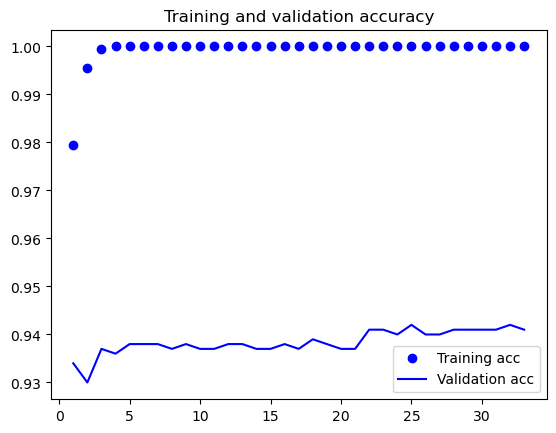

In [13]:
acc = torch.tensor(model.acc_list)
val_acc = torch.tensor(model.val_acc_list)
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

### **Results**
- Validation accuracy peaks around 0.955 and declines slightly with further training epochs to 0.95

- However, accuracy is much more stable as compared to previous results without fine-tuning the last conv layers (distribution of errors may improve)

- To improve performance - we may need to increase number of convolution layers to obtain a larger effective receptive area ("look" at a larger area of the image to capture global features)

- May need to use Skip connect/ residual connections to avoid vanishing gradients as more layers are added

- Data augmentation and dropout can be used to improve the robustness of the model

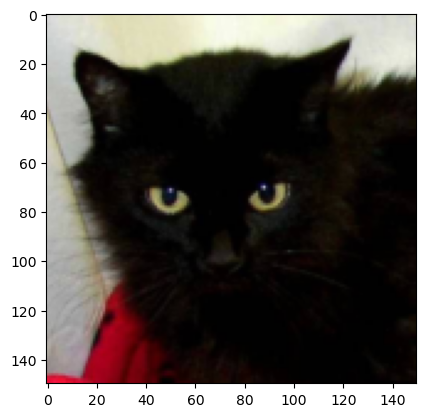

In [14]:
# visualizing the activations
img = test_dataset[0][0].unsqueeze(0)
img_tensor = test_dataset[0][0].unsqueeze(0).to(device)

# plot out img
plt.imshow(img.squeeze(0).permute(1,2,0))
plt.show()

In [15]:
# compute the activations for each layer
model.eval()

activations = list() # store activations
# hook function to return output from each layer
def hook_fn(module, input, output):
    activations.append(output)

hook_handles = list() # store hook handles
# register the hook
for name, layer in model.named_children():
    if name == "pretrained_layers":
        for name, layer in layer.named_children():
            handle = layer.register_forward_hook(hook_fn)
            hook_handles.append(handle)

_ = model(img_tensor)

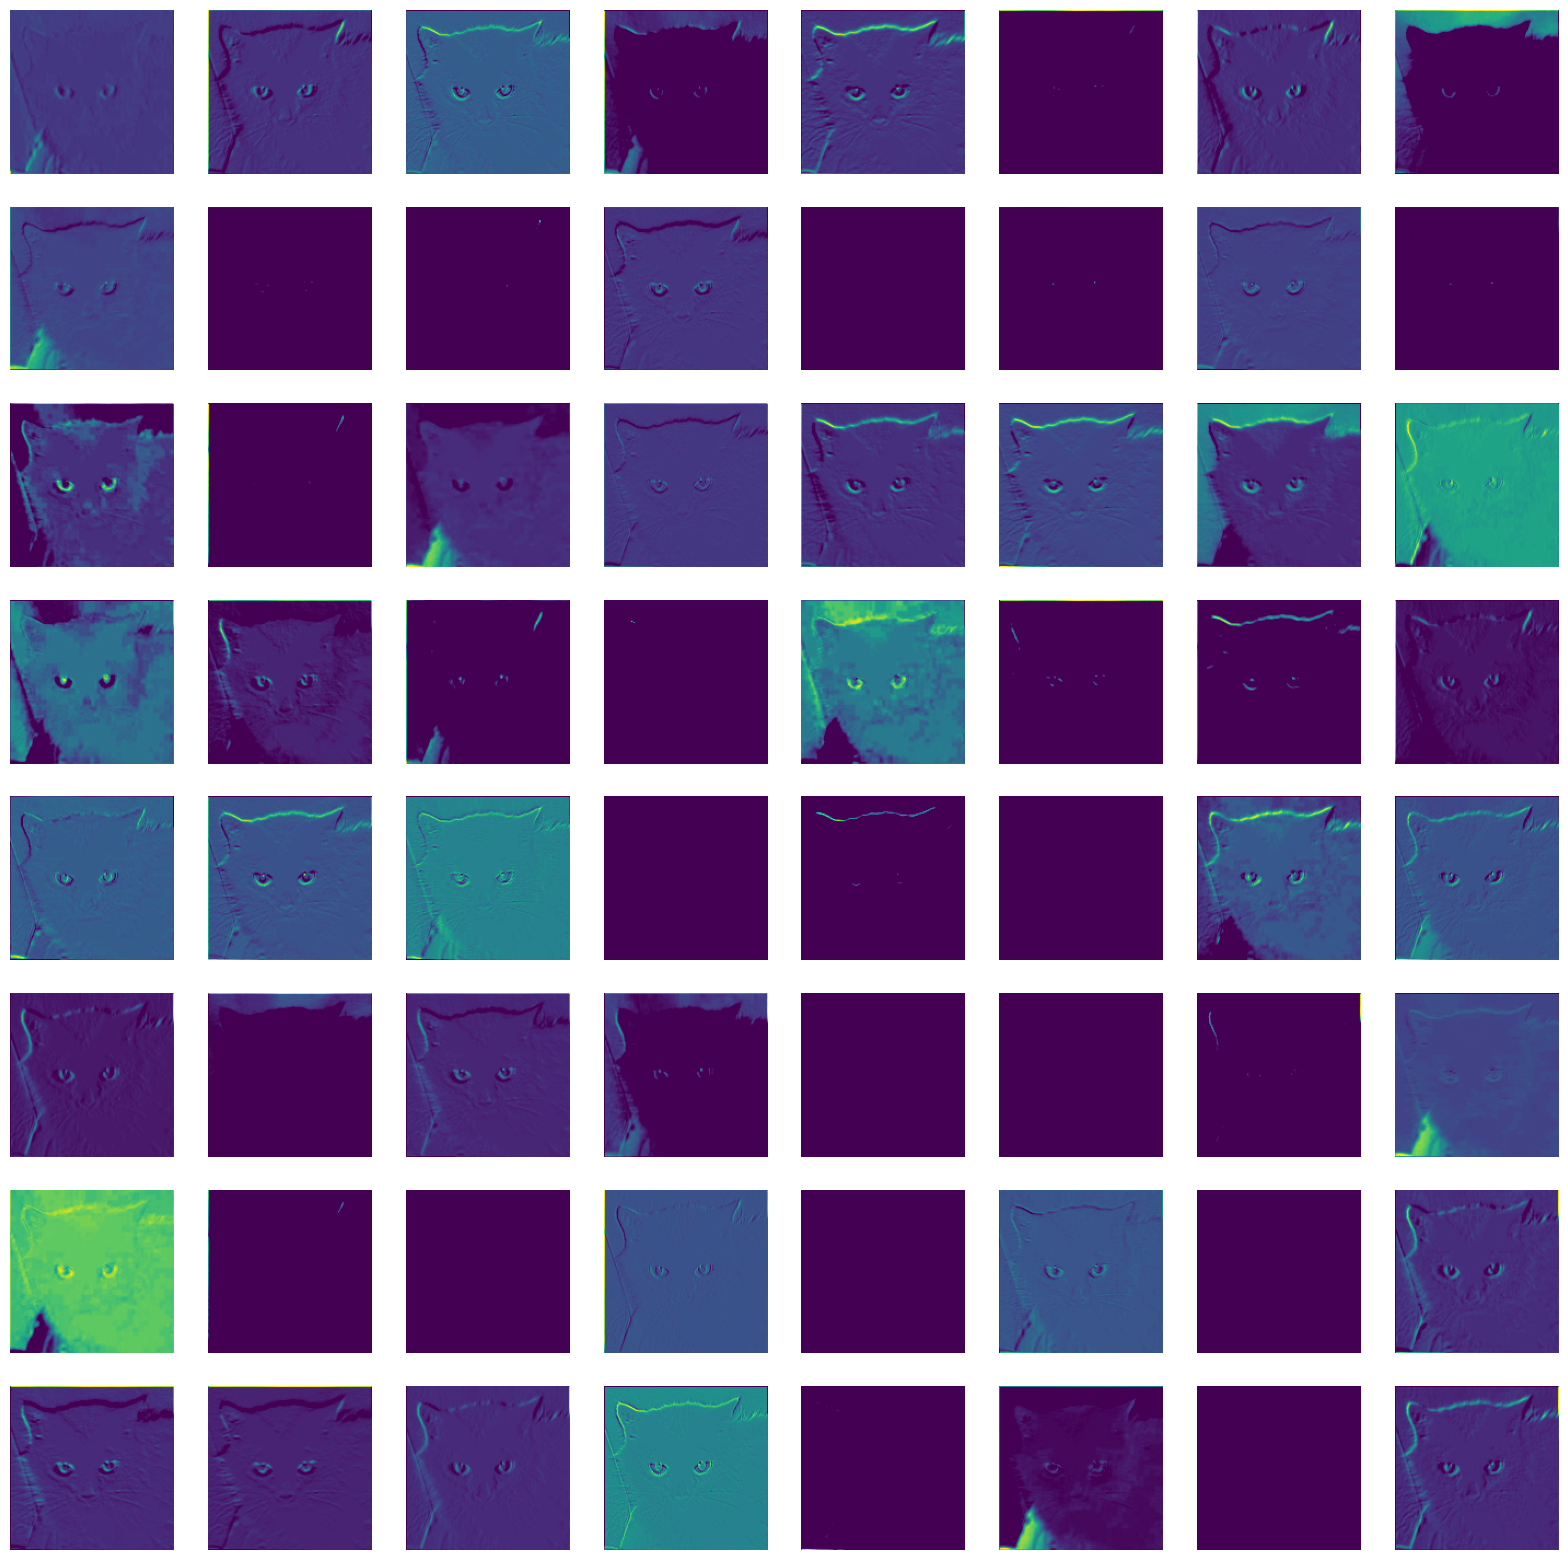

In [16]:
# print out the activations for the first conv layer
plt.subplots(8,8,figsize=(20,20))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(activations[0][0,i].cpu().detach())
    plt.axis("off")

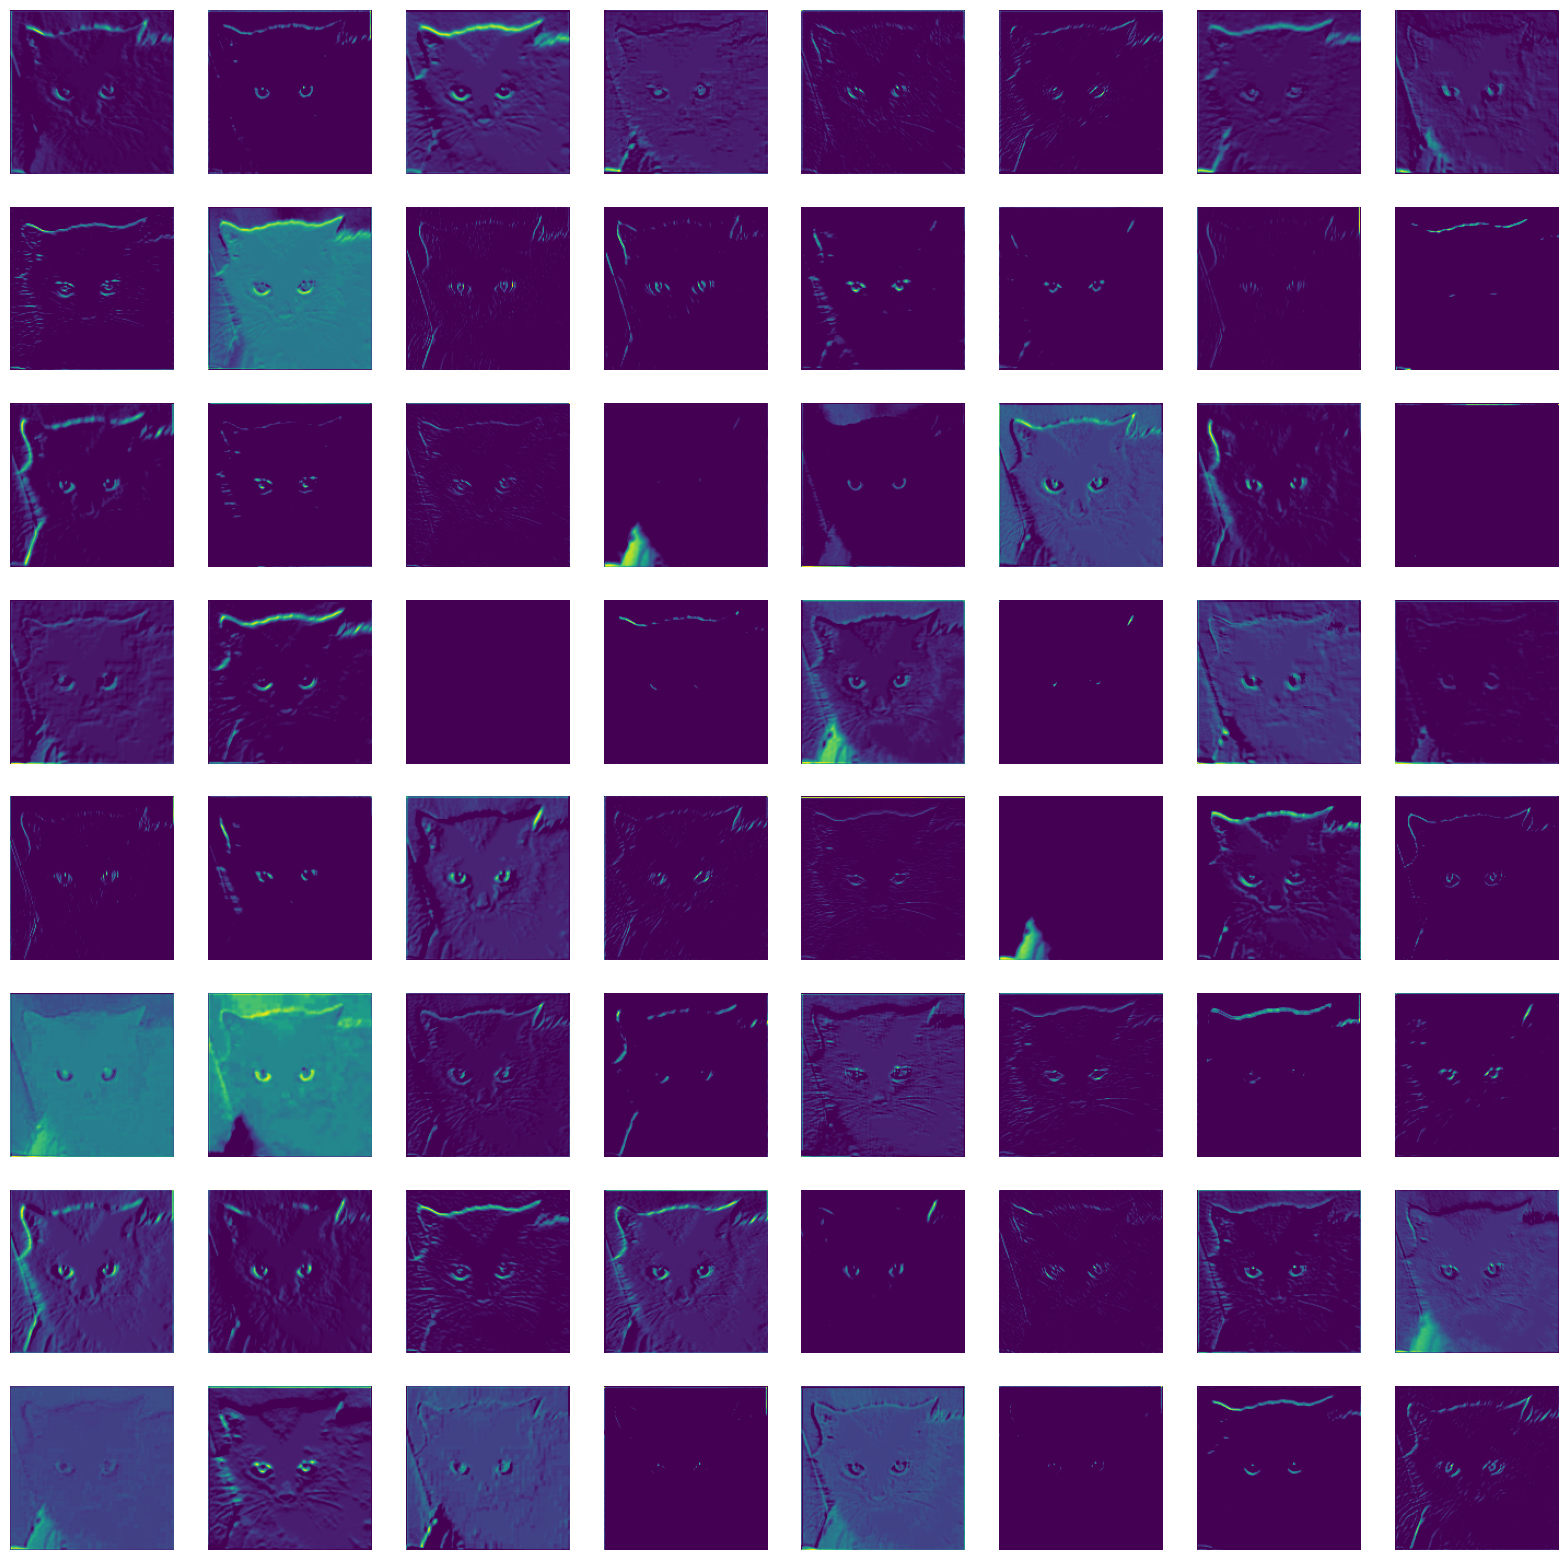

In [17]:
# print out the activations for the 2nd conv layer
plt.subplots(8,8,figsize=(20,20))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(activations[2][0,i].cpu().detach())
    plt.axis("off")

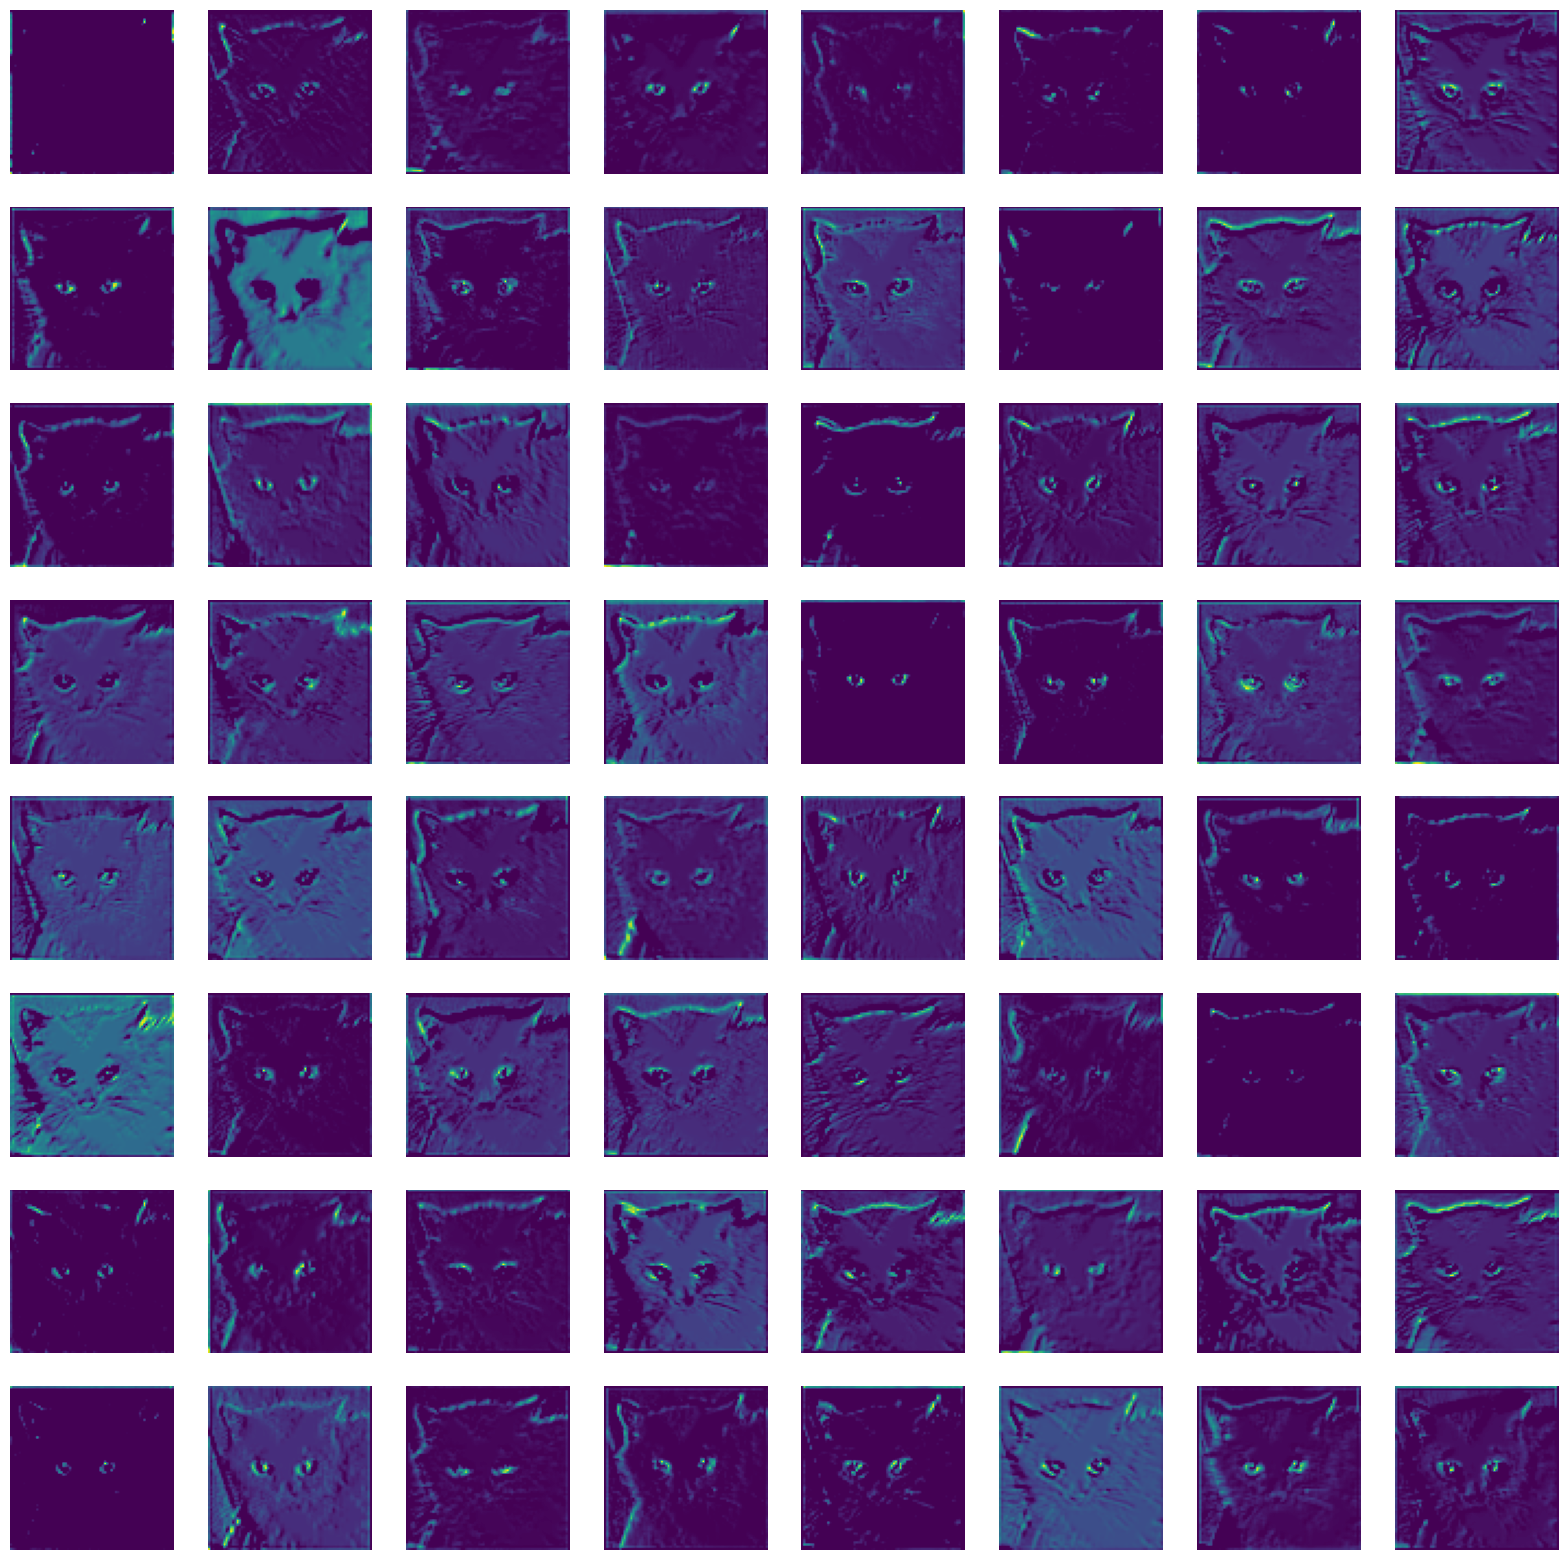

In [18]:
# print out the activations for the 4th layer
plt.subplots(8,8,figsize=(20,20))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(activations[5][0,i].cpu().detach())
    plt.axis("off")

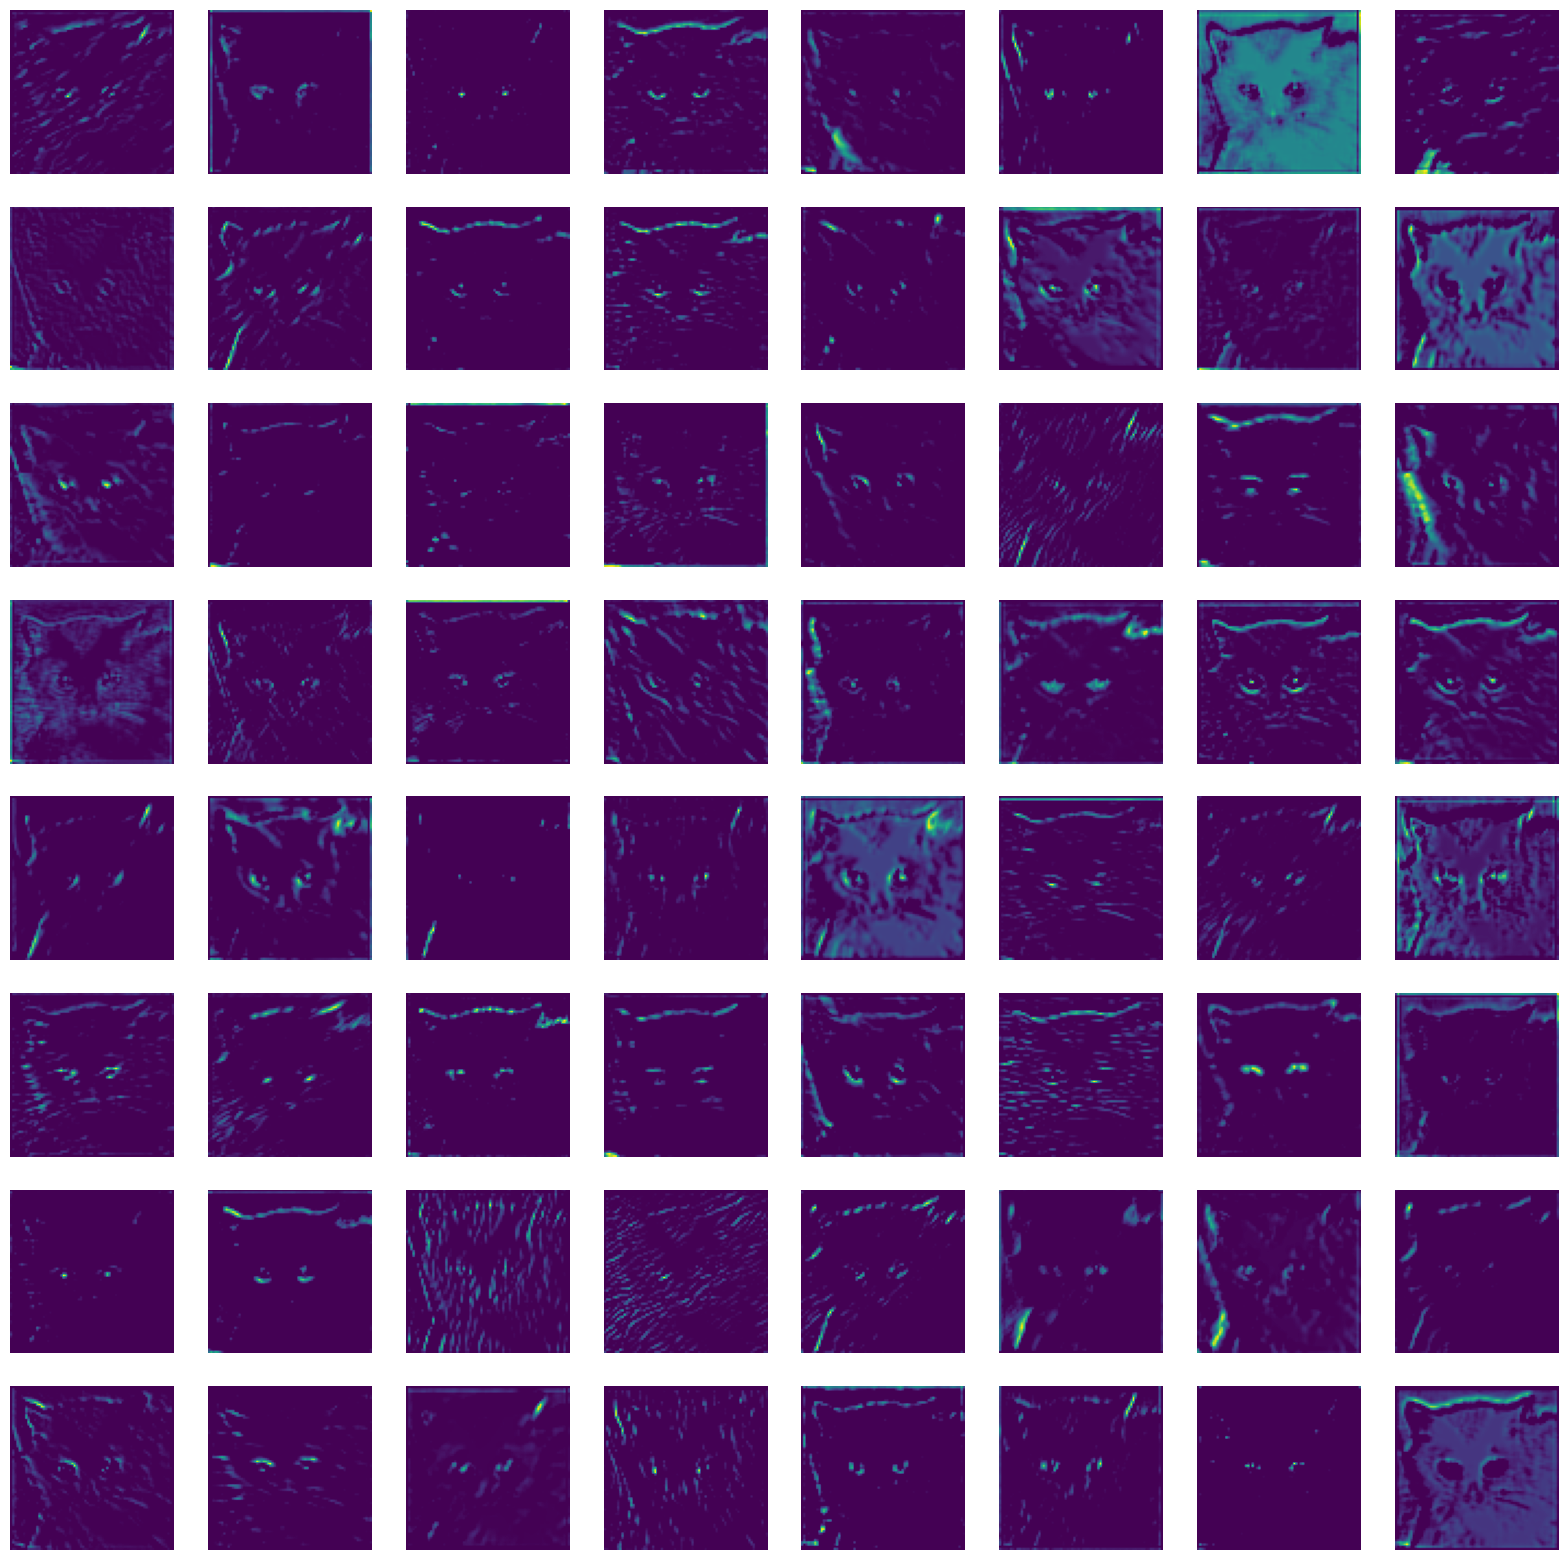

In [19]:
# print out the activations for the 5th layer
plt.subplots(8,8,figsize=(20,20))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(activations[7][0,i].cpu().detach())
    plt.axis("off")

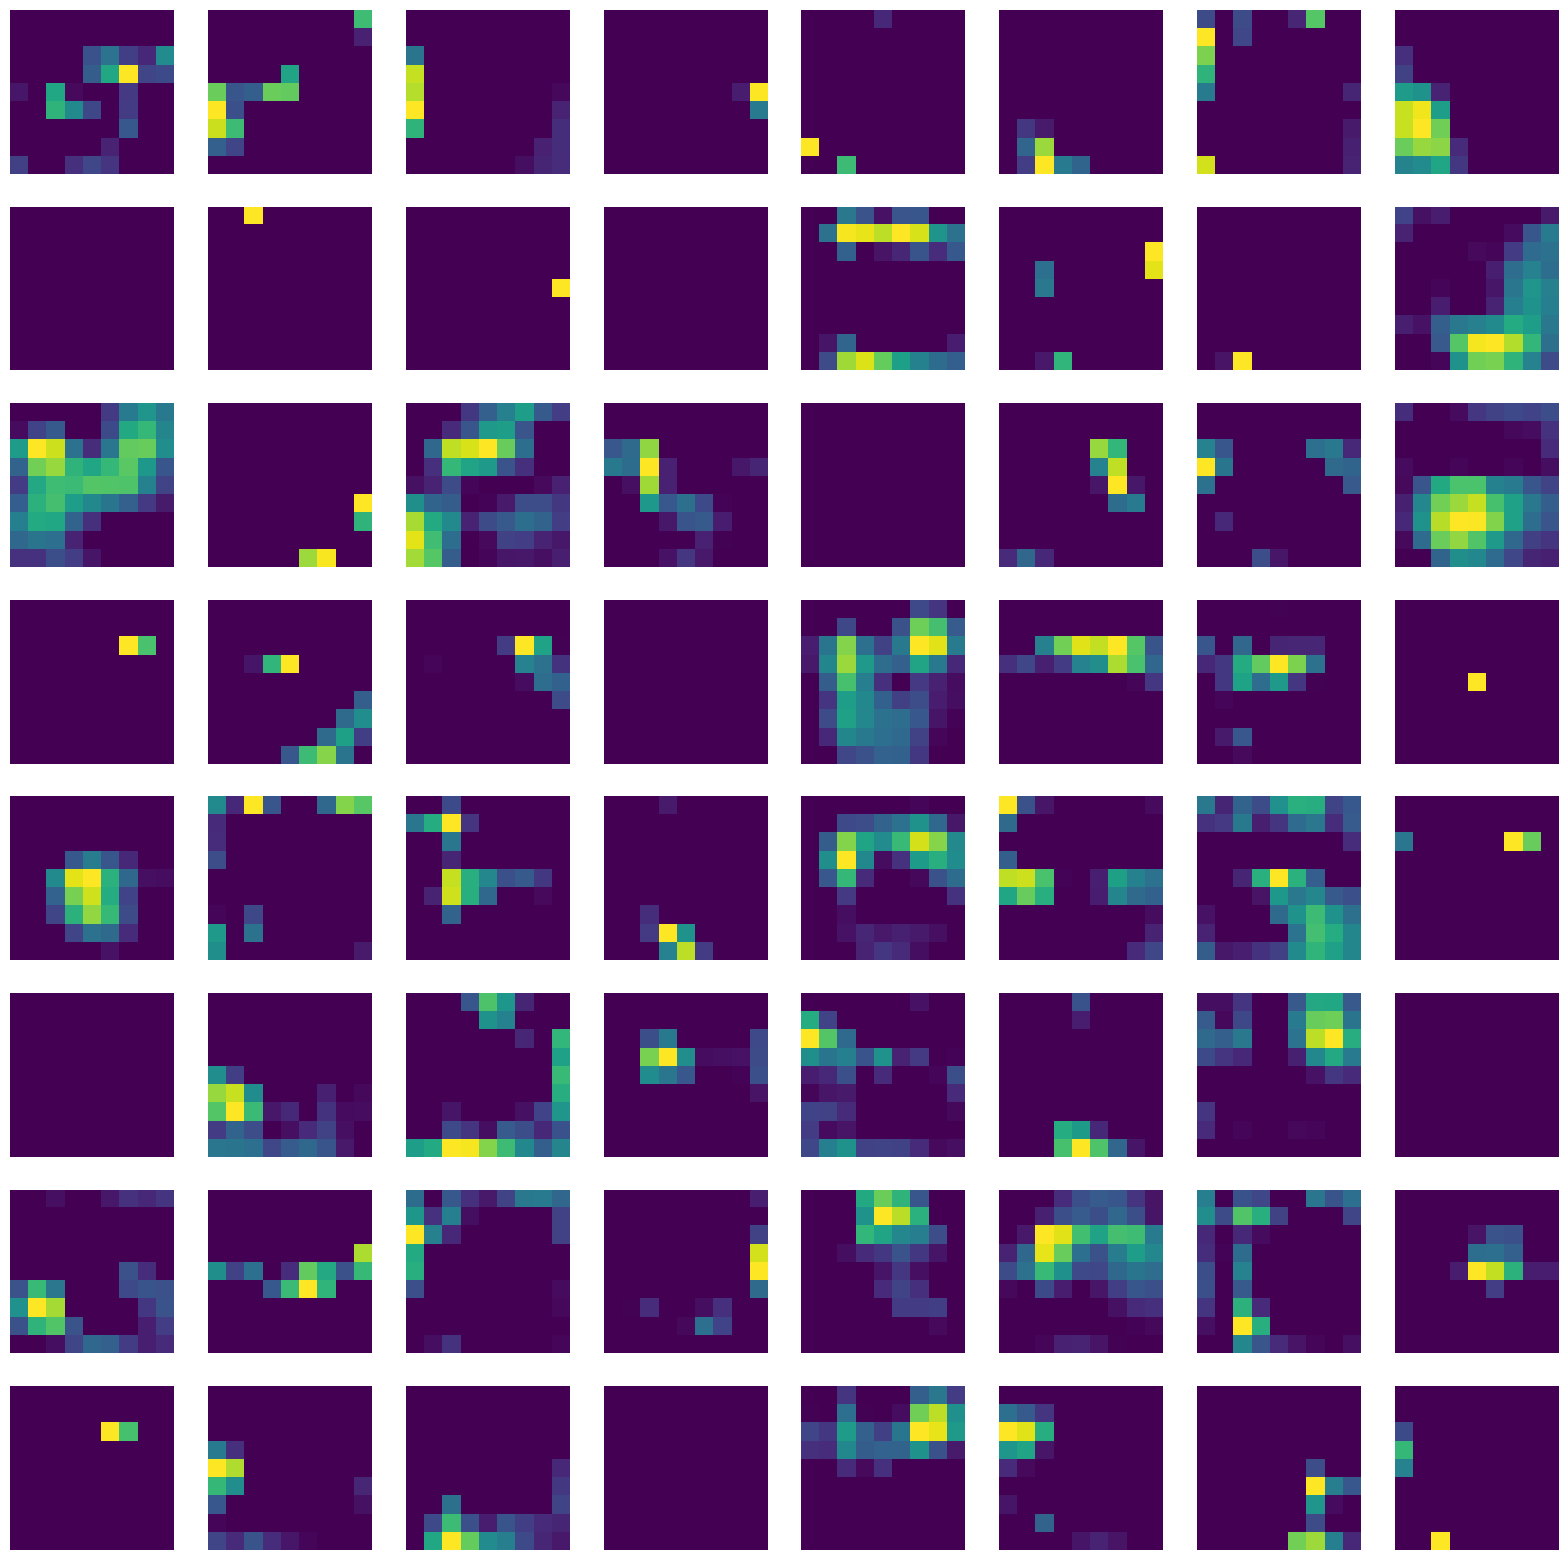

In [20]:
# print out the activations for the last conv layer
plt.subplots(8,8,figsize=(20,20))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(activations[28][0,i].cpu().detach())
    plt.axis("off")

### **Visualization of Output of Convolutional Filters**

- Earlier layers still looks like certain aspect of original image - slowly focuses more on a certain aspect of the original image

- Later layers compress information from a large area in the original image - create abstract representation

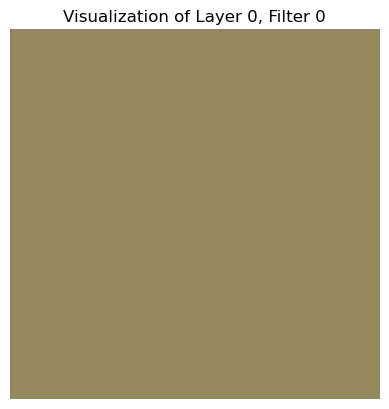

In [21]:
for handle in hook_handles:
    handle.remove()
    
# visualize the input that maximizes the conv layer
import numpy as np
input_tensor = np.uint8(np.random.uniform(size=(1,3,150, 150))) # Random noise
input_tensor = torch.Tensor(input_tensor).to(device)  # Convert to tensor
input_tensor.requires_grad = True  # Enable gradient recording

# Optimization parameters
learning_rate = 1
num_steps = 40

# Gradient ascent loop
for step in range(num_steps):
    output = model.pretrained_layers[0](input_tensor)  # Forward pass
    loss = -torch.mean(output[0])  # Score for target class
    loss.backward()  # Backpropagate to compute gradients
    with torch.no_grad():
        input_tensor += learning_rate * input_tensor.grad  # Gradient ascent
    input_tensor.grad.zero_()  # Clear gradients

# Post-process and visualize the optimized input
optimized_image = input_tensor.cpu().detach().squeeze().permute(1, 2, 0).numpy()
optimized_image = (optimized_image -optimized_image.mean())/(optimized_image.std()+1e-5)  # Center on zero
optimized_image*= 0.1
optimized_image+=0.5
optimized_image = np.clip(optimized_image, 0, 1)
optimized_image*=255
optimized_image = np.clip(optimized_image,0,255).astype("uint8")  # Normalize to [0, 1]

plt.imshow(optimized_image)
plt.title("Visualization of Layer 0, Filter 0")
plt.axis("off")
plt.show()

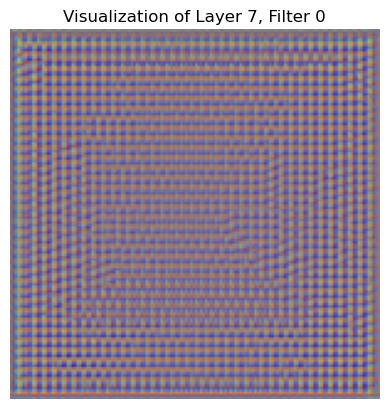

In [22]:
# visualize the input that maximizes the convolution layer
import numpy as np
input_tensor = np.uint8(np.random.uniform(size=(1,3,150, 150))) # Random noise
input_tensor = torch.Tensor(input_tensor).to(device)  # Convert to tensor
input_tensor.requires_grad = True  # Enable gradient recording
target_class = torch.tensor([0], dtype=torch.float32).to(device)

# Optimization parameters
learning_rate = 1
num_steps = 40

# Gradient ascent loop
for step in range(num_steps):
    output = input_tensor
    for count, layer in enumerate(model.pretrained_layers):
        output = layer(output)
        if count >=7:
            break
    # Forward pass
    loss = -torch.mean(output[0])  # Score for target class
    loss.backward()  # Backpropagate to compute gradients
    with torch.no_grad():
        input_tensor += learning_rate * input_tensor.grad  # Gradient ascent
    input_tensor.grad.zero_()  # Clear gradients

# Post-process and visualize the optimized input
optimized_image = input_tensor.cpu().detach().squeeze().permute(1, 2, 0).numpy()
optimized_image = (optimized_image -optimized_image.mean())/(optimized_image.std()+1e-5)  # Center on zero
optimized_image*= 0.1
optimized_image+=0.5
optimized_image = np.clip(optimized_image, 0, 1)
optimized_image*=255
optimized_image = np.clip(optimized_image,0,255).astype("uint8")  # Normalize to [0, 1]

plt.imshow(optimized_image)
plt.title("Visualization of Layer 7, Filter 0")
plt.axis("off")
plt.show()

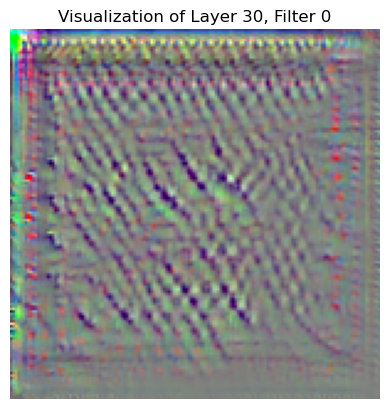

In [23]:
# visualize the input that maximizes the convolution layer
import numpy as np
input_tensor = np.uint8(np.random.uniform(size=(1,3,150, 150))) # Random noise
input_tensor = torch.Tensor(input_tensor).to(device)  # Convert to tensor
input_tensor.requires_grad = True  # Enable gradient recording

# Optimization parameters
learning_rate = 1
num_steps = 40

# Gradient ascent loop
for step in range(num_steps):
    output = input_tensor
    for count, layer in enumerate(model.pretrained_layers):
        output = layer(output)
    # Forward pass
    loss = -torch.mean(output[0])  # Score for target class
    loss.backward()  # Backpropagate to compute gradients
    with torch.no_grad():
        input_tensor += learning_rate * input_tensor.grad  # Gradient ascent
    input_tensor.grad.zero_()  # Clear gradients

# Post-process and visualize the optimized input
optimized_image = input_tensor.cpu().detach().squeeze().permute(1, 2, 0).numpy()
optimized_image = (optimized_image -optimized_image.mean())/(optimized_image.std()+1e-5)  # Center on zero
optimized_image*= 0.1
optimized_image+=0.5
optimized_image = np.clip(optimized_image, 0, 1)
optimized_image*=255
optimized_image = np.clip(optimized_image,0,255).astype("uint8")  # Normalize to [0, 1]

plt.imshow(optimized_image)
plt.title("Visualization of Layer 30, Filter 0")
plt.axis("off")
plt.show()

### **Understanding Activations of Conv Nets**
- We identify the inputs that maximize the activations of the filters

- For first few layers, they do not react strongly to a certain input pattern 

- Mid layers activated by certain input patterns which are more generic 

- Latest layers activated by patterns more specific to the classification task 

- therefore, it makes sense to fine-tune the last few layers
